In [1]:
import altair as alt
from bayes_window import BayesWindow, models, BayesRegression, LMERegression
from bayes_window.generative_models import generate_fake_lfp

try:
    alt.renderers.enable('altair_saver', fmts=['png'])
except Exception:
    pass

In [2]:
# Draw some fake data:
df, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=15, n_trials=30)

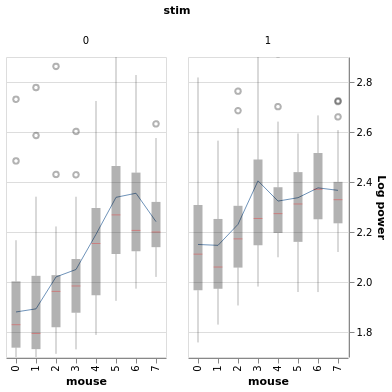

In [3]:
BayesWindow(df=df, y='Log power', treatment='stim', group='mouse').plot(x='mouse').facet(column='stim')


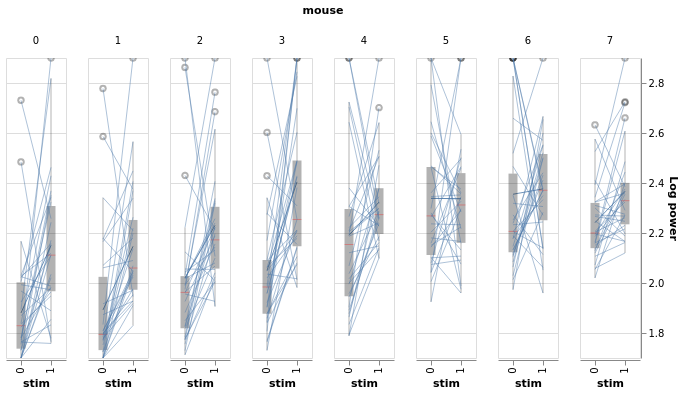

In [4]:
BayesWindow(df=df, y='Log power', treatment='stim', group='mouse', detail='i_trial').data_box_detail().facet(
    column='mouse')

In [5]:
# Initialize:
window = BayesRegression(df=df, y='Power', treatment='stim', group='mouse')
# Fit:
window.fit(model=models.model_hierarchical, add_group_intercept=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='gamma')

chart_power_difference = (window.chart + window.chart_posterior_kde).properties(title='Posterior')

2021-11-25 02:47:56.387633: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2021-11-25 02:47:56.387769: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 450.142.0 does not match DSO version 450.156.0 -- cannot find working devices in this configuration


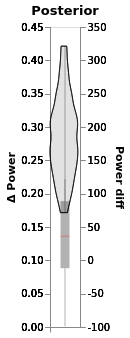

In [6]:
chart_power_difference


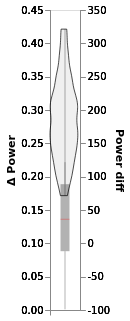

In [7]:
# TODO diff_y is missing from data_and posterior
# chart_power_difference_box
window.data_and_posterior.rename({'Power': 'Power diff'}, axis=1, inplace=True)
# window.plot(x=':O',independent_axes=True).properties(title='Posterior')
window.chart

In [8]:
window = LMERegression(df=df, y='Log power', treatment='stim', group='mouse')
window.fit_anova();

Log_power~stim
           sum_sq    df     F  PR(>F)
stim        0.12   1.0  5.11    0.04
Residual    0.32  14.0   NaN     NaN


In [9]:
window = LMERegression(df=df, y='Log power', treatment='stim')
window.fit_anova();

Log_power~stim
           sum_sq     df      F  PR(>F)
stim        3.50    1.0  34.06     0.0
Residual   49.19  478.0    NaN     NaN


In [10]:
window = LMERegression(df=df, y='Power', treatment='stim', group='mouse')
window.fit_anova();

Power~stim
              sum_sq    df     F  PR(>F)
stim       21290.79   1.0  1.43    0.25
Residual  208467.85  14.0   NaN     NaN


In [11]:
window = LMERegression(df=df, y='Power', treatment='stim')
window.fit_anova();

Power~stim
                 sum_sq     df     F  PR(>F)
stim      6.387237e+05    1.0  2.06    0.15
Residual  1.483123e+08  478.0   NaN     NaN


In [12]:
window.fit_anova(formula='Log_power ~ stim + mouse + mouse*stim');

Log_power ~ stim + mouse + mouse*stim
             sum_sq     df      F  PR(>F)
mouse         8.00    7.0  13.39    0.00
stim          3.50    1.0  41.09    0.00
mouse:stim    1.61    7.0   2.70    0.01
Residual     39.58  464.0    NaN     NaN


In [13]:
window.fit_anova(formula='Power ~ stim + mouse ', robust="hc3");

Power ~ stim + mouse 
                 sum_sq     df     F  PR(>F)
mouse     8.797198e+06    7.0  4.08    0.00
stim      6.267476e+05    1.0  2.03    0.15
Residual  1.452194e+08  471.0   NaN     NaN


In [14]:
window.fit_anova(formula='Log_power ~ stim +mouse', robust="hc3");

Log_power ~ stim +mouse
           sum_sq     df      F  PR(>F)
mouse       8.91    7.0  14.55     0.0
stim        3.44    1.0  39.32     0.0
Residual   41.19  471.0    NaN     NaN


In [15]:
# Initialize:
window = LMERegression(df=df, y='Log power', treatment='stim', group='mouse')
window.fit(add_data=False);

Using formula Log_power ~  C(stim, Treatment) + (1 | mouse)


                         Coef. Std.Err.       z  P>|z| [0.025 0.975]
Intercept                1.906    0.042  45.516  0.000  1.824  1.988
C(stim, Treatment)[T.1]  0.171    0.027   6.330  0.000  0.118  0.224
1 | mouse                0.054    0.009   6.205  0.000  0.037  0.071
Group Var                0.002    0.006                             


/home/m/env_jb1/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


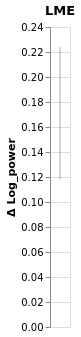

In [16]:
chart_power_difference_lme = window.plot().properties(title='LME')
chart_power_difference_lme

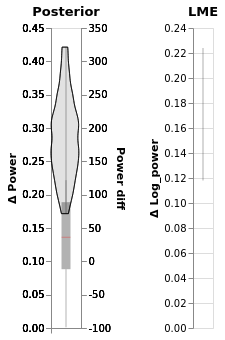

In [17]:
chart_power_difference | chart_power_difference_lme

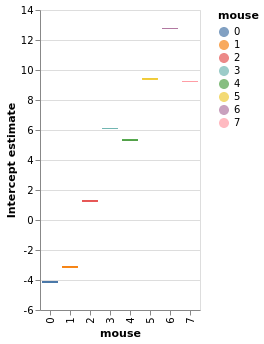

In [18]:
# Initialize:
window = BayesRegression(df=df, y='Power', treatment='stim', group='mouse', detail='i_trial')
# Fit:
window.fit(model=models.model_hierarchical, add_group_intercept=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='gamma');

chart_detail_and_intercepts = window.plot_intercepts(x='mouse')
window.chart_posterior_intercept

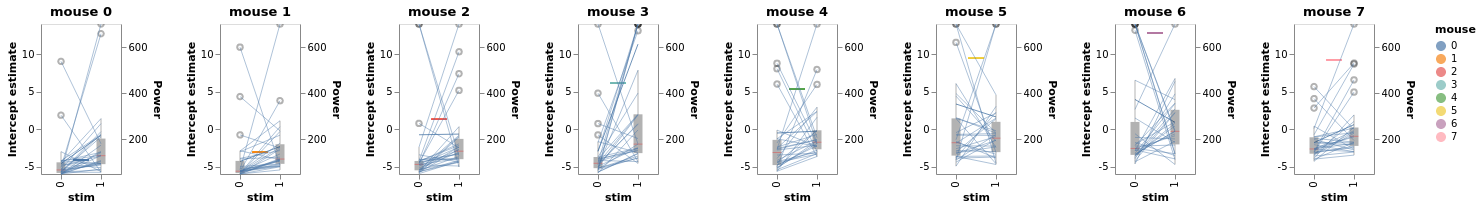

In [19]:
chart_detail_and_intercepts

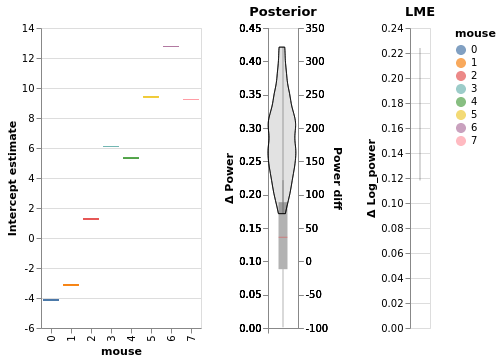

In [20]:
window.chart_posterior_intercept | chart_power_difference | chart_power_difference_lme

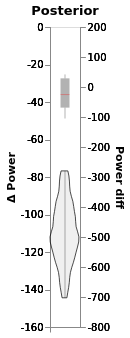

In [21]:
# Initialize:
df_null, df_monster_null, _, _ = generate_fake_lfp(mouse_response_slope=0, n_trials=30)
window = BayesRegression(df=df_null, y='Power', treatment='stim', group='mouse')
# Fit:
window.fit(model=models.model_hierarchical, add_group_intercept=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='normal')

# Plot:
chart_power_difference = window.plot(independent_axes=False,
                                     ).properties(title='Posterior')

chart_power_difference

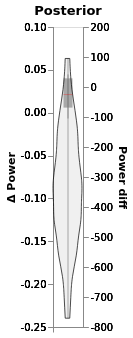

In [22]:
# Initialize:
window = BayesRegression(df=df_null, y='Power', treatment='stim', group='mouse')
# Fit:
window.fit(model=models.model_hierarchical, add_group_intercept=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='gamma')
# Plot:
window.plot(independent_axes=False,
            ).properties(title='Posterior')


In [23]:
# NBVAL_SKIP
# Initialize:
window = BayesRegression(df=df_monster, y='Power', treatment='stim', group='mouse')
# Fit:
window.fit(model=models.model_hierarchical, add_group_intercept=True,
           num_warmup=500, n_draws=160, progress_bar=True,
           add_group_slope=False, robust_slopes=False,
           do_make_change='subtract', dist_y='gamma');

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

  0%|          | 0/660 [00:00<?, ?it/s]

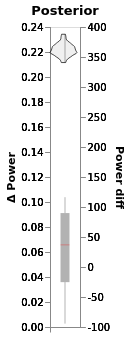

In [24]:
# NBVAL_SKIP
alt.data_transformers.disable_max_rows()
chart_power_difference_monster = window.plot(independent_axes=False).properties(title='Posterior')
chart_power_difference_monster

Using formula Log_power ~  C(stim, Treatment) + (1 | mouse)


/home/m/env_jb1/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                         Coef. Std.Err.       z  P>|z| [0.025 0.975]
Intercept                1.941    0.040  48.484  0.000  1.862  2.019
C(stim, Treatment)[T.1]  0.149    0.002  70.655  0.000  0.145  0.153
1 | mouse                0.050    0.009   5.761  0.000  0.033  0.067
Group Var                0.003    0.006                             


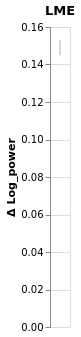

In [25]:
# NBVAL_SKIP
window = LMERegression(df=df_monster,
                         y='Log power', treatment='stim', group='mouse')
window.fit()

chart_power_difference_monster_lme = window.plot().properties(title='LME')
chart_power_difference_monster_lme

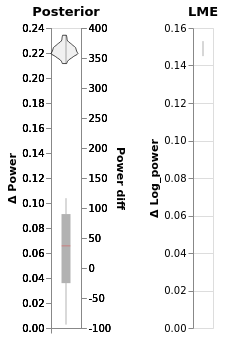

In [26]:
# NBVAL_SKIP
(chart_power_difference_monster | chart_power_difference_monster_lme)
